# Machine Learning & Statistics Project 2020

In this project you must create a web service that uses machine learning to make predictions
based on the data set powerproduction available on Moodle. The goal is to
produce a model that accurately predicts wind turbine power output from wind speed
values, as in the data set. You must then develop a web service that will respond with
predicted power values based on speed values sent as HTTP requests.

### Objectives:

Explore the Power production dataset

Explore models

Determine model to use

Develop web service
***************************************************************

In [1]:
# Import libraries
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import numpy as np
import sklearn.neighbors as nei
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import sklearn.model_selection as mod
import sklearn.preprocessing as skpp
import sklearn.metrics as skme
import tensorflow.keras as kr

In [2]:
# Make matplotlib show interactive plots in the notebook.
%matplotlib inline

# Apply the default seaborn settings.
sns.set()

#Set plot style.
plt.style.use("ggplot")

# Plot size.
plt.rcParams['figure.figsize'] = [18, 10]

In [3]:
# Import the power production dataset and view the data
data = pd.read_csv("powerproduction.csv")

pd.set_option("max_rows", None)
data

,speed,power
0,0.000,0.000
1,0.125,0.000
2,0.150,0.000
3,0.225,0.000
4,0.275,0.000
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553


In [4]:
data.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


#### About Dataset

The dataset powerproduction will be used to produce a model that accurately predicts wind turbine power output from wind speed values. It contains 500 values for two variables speed and power, speed being wind speed and power being the wind turbine power output. Although the measurement units of the variables are not defined wind speed is most commonly measured in metres/second (m/s) and the power output measured in Kilowatts (kW). The wind speed ranges from 0 m/s to 25 m/s and the power output ranges between 0 kW to 113.556 kW.
*************************************************************

#### View Dataset

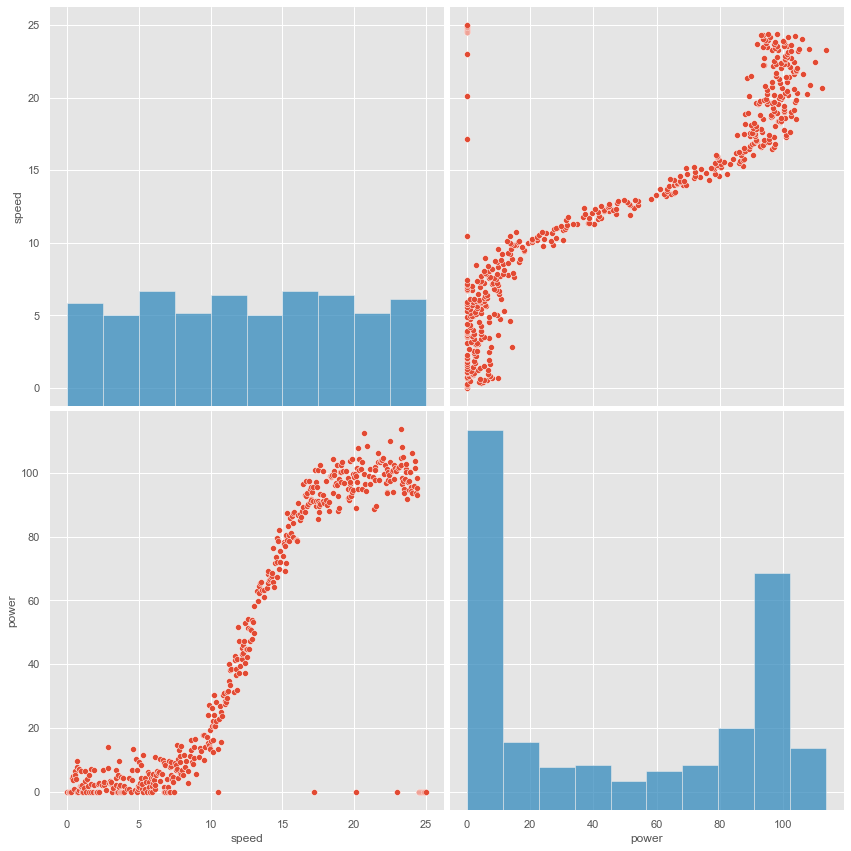

In [5]:
# Create a pairplot to view the dataset
sns.pairplot(data, height=6)

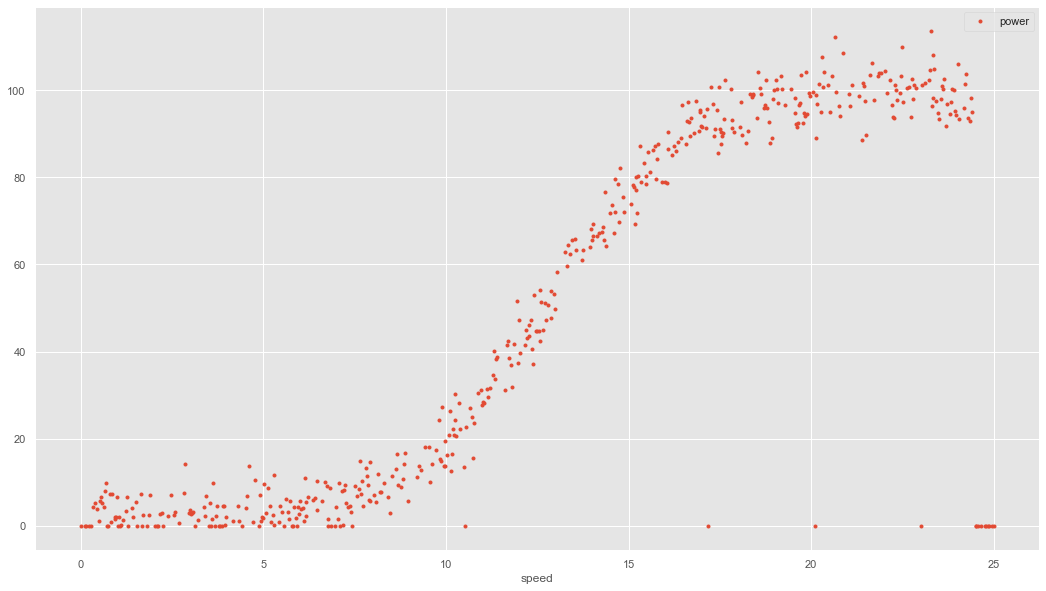

In [6]:
# Plot data
data.plot(x="speed", y="power", style=".")
plt.show()

#### Observations

* The wind turbines do not begin to operate until the wind speed reaches over 3 m/s. Wind turbines operate automatically and self-start when the wind speed reaches an average of about three to five m/s[1].


* The output increases linearly from approxiately 10 to 25 m/s. 25 m/s is the maximum operational limit[1].


* When the wind exceeds the maximum operational limit of 25m/s the wind turbine shuts down.


* The wind speed data value range appears to follow a uniform distribution


* The power output data has a greater distribution at the low and high power output range



Due to the operational constraints of the wind turbines there are a number of zero values within the dataset. Most of these are situated at the beginning, where wind speed is under 3 m/s, and at the end when it is near its limit of 25 m/s. There are some other random zero value data points throughout the dataset which could be related to the trubines being shut down for operational and maintenance purposes[1]. 

For modelling purposes these data points will be removed from the dataset as they do not appear to follow the natural relationship between speed and power, and it is best to include only data points relating to the turbines when they were in operation. 

#### Remove Zero Value Data Points

In [7]:
# Remove zero power values https://stackoverflow.com/questions/22649693/drop-rows-with-all-zeros-in-pandas-data-frame
df = data[(data.power != 0)]

# View data details
df.describe()

,speed,power
count,451.000000,451.000000
mean,13.004302,53.231246
std,6.835979,40.522055
min,0.325000,0.067000
25%,7.344500,8.543500
50%,13.038000,58.168000
75%,18.781500,94.725500
max,24.399000,113.556000


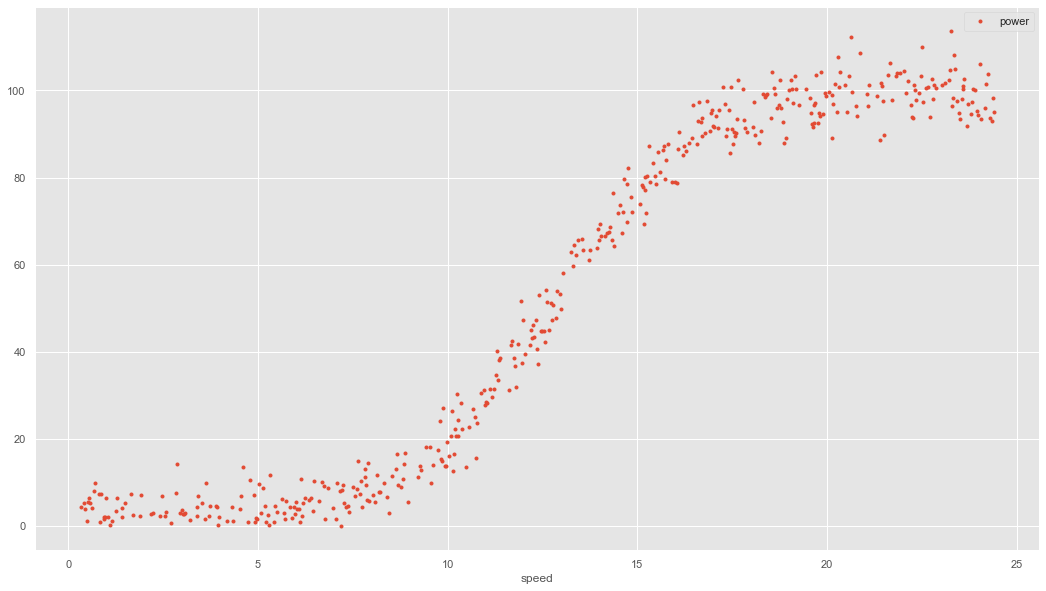

In [8]:
# Plot updated dataset
df.plot(x="speed", y="power", style=".")
plt.show()

After the zero power output data points are removed the dataset contains 451 data points. From the plot above it is clear to see that an S-shaped speed to power relationship curve exists, also known as a Sigmoid function curve[2].
***********************************************************

#### Explore Models

##### Sigmoid Curve Model


ABOUT!!!!!!!!!!!!!!!!


In [11]:
Sdata = df.copy()


x = Sdata['speed'].values
y = Sdata['power'].values

x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size= 0.3, random_state=0)

SpoF = 100

y_train = y_train / SpoF
y_test = y_test / SpoF

In [12]:
# Create sigmoid curve model. 
# Code adapted from https://stackoverflow.com/questions/4308168/sigmoidal-regression-with-scipy-numpy-python-etc  
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
# https://stackoverflow.com/questions/55725139/fit-sigmoid-function-s-shape-curve-to-data-using-python


# Define a function for sigmoid output
def sigmoid(x, k, x0):
    """ Function to return scaled (0 to 1) power output based
        on input 'x', a numpy array of wind speed number/s with
        'k' and 'x0' number modifiers from the scipy curve_fit function
    """
    return 1.0 / (1 + np.exp(-k * (x - x0)))

# Fit the training data to the curve
popt, pcov = curve_fit(sigmoid, x_train, y_train)

# Extract the scipy curve_fit function 'k' and 'x0'
# number modifiers from the fitted curve
estimated_k, estimated_x0 = popt

# Predict the fitted curve values for the training and test datasets using
# the extracted scipy curve_fit function 'k' and 'x0'
# number modifiers from the fitted curve
y_train_predict = sigmoid(x_train, k=estimated_k, x0=estimated_x0)*SpoF
y_test_predict = sigmoid(x_test, k=estimated_k, x0=estimated_x0)*SpoF

#####  Evaluate the performance of the algorithm

In [13]:
# Adapted from https://vijay-choubey.medium.com/how-to-evaluate-the-performance-of-a-machine-learning-model-d12ce920c365

# Mean Squared Error for training and test datasets
print(f"Mean Squared Error for training model is: {skme.mean_squared_error(y_train, y_train_predict):.2f}")
print(f"Mean Squared Error for testing data is: {skme.mean_squared_error(y_test, y_test_predict):.2f}")

# Mean Abasolute Error for training and test datasets
print(f"\nMean Absolute Error for training model is: {skme.mean_absolute_error(y_train, y_train_predict):.2f}")
print(f"Mean Absolute Error for testing data is: {skme.mean_absolute_error(y_test, y_test_predict):.2f}")

# Test the model prediction
print(f"\nA wind speed of 15 gives a power output of: {sigmoid(np.array([15]), k=estimated_k, x0=estimated_x0)[0]*SpoF:.2f}")

Mean Squared Error for training model is: 4393.63
Mean Squared Error for testing data is: 4213.26

Mean Absolute Error for training model is: 52.71
Mean Absolute Error for testing data is: 50.22

A wind speed of 15 gives a power output of: 77.48


##### Plot the datasets to compare

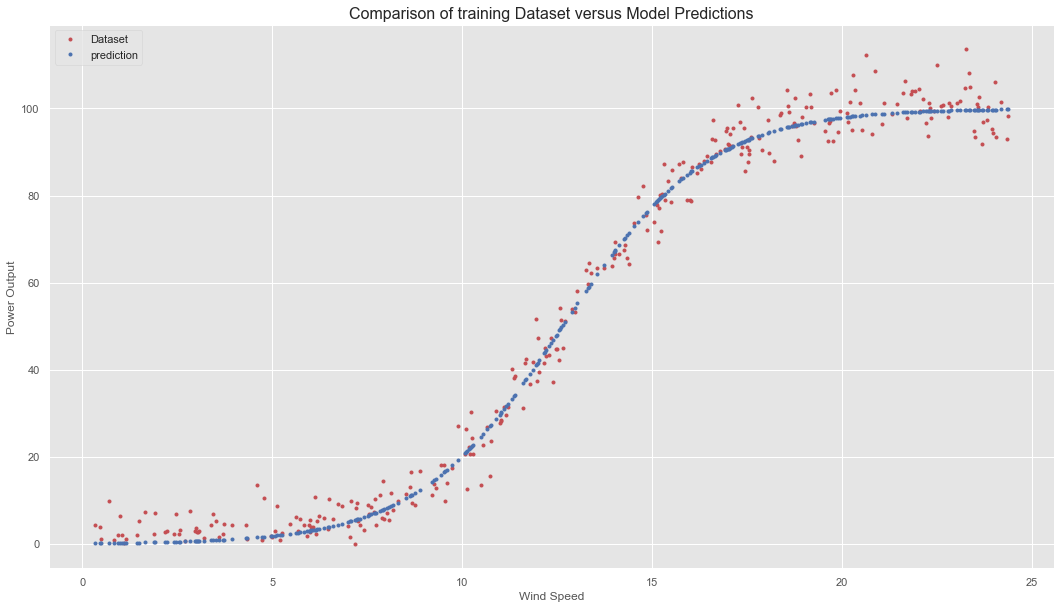

In [14]:
# Plot training dataset comparison
plt.plot(x_train, y_train*SpoF, 'r.', label='Dataset')
plt.plot(x_train, y_train_predict, 'b.', label='prediction')
plt.title("Comparison of training Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

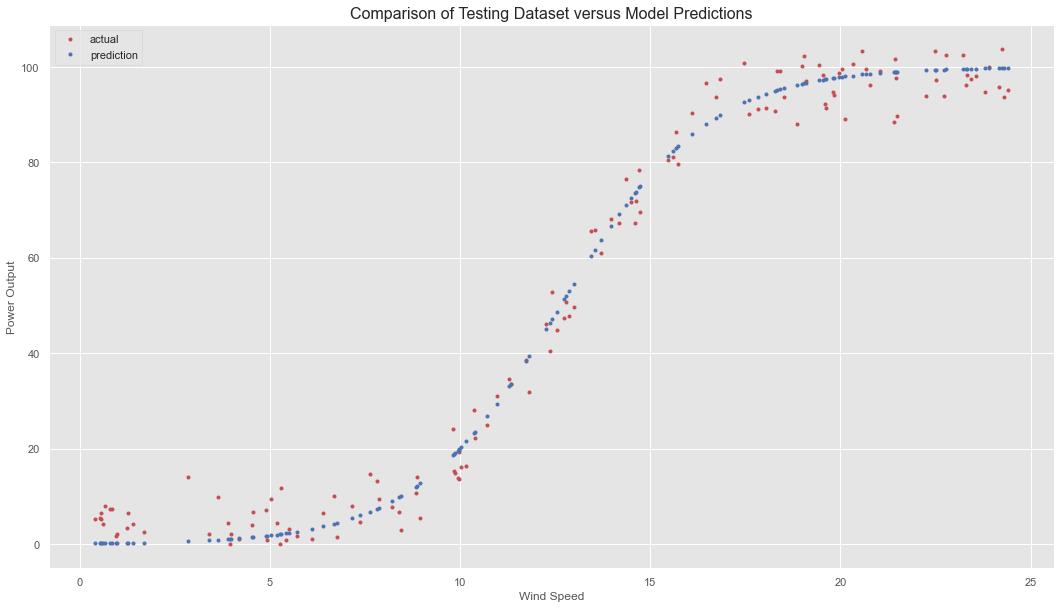

In [15]:
# Plot testing dataset comparison
plt.plot(x_test, y_test*SpoF, 'r.', label='actual')
plt.plot(x_test, y_test_predict, 'b.', label='prediction')
plt.title("Comparison of Testing Dataset versus Model Predictions", fontsize = 16)
plt.xlabel("Wind Speed")
plt.ylabel("Power Output")
plt.legend();

##### KNN

Another approach we can use is the KNN.

In [34]:
Kdata = df.copy()

x = Kdata.iloc[:,0].values
y = Kdata.iloc[:,1].values

x = x.reshape(-1, 1)

# Set in input and output
inputs = x
outputs = y

In [35]:
# Create the classifier
knn = nei.KNeighborsClassifier(n_neighbors=5)

In [37]:
# Train the classifier using the inputs and outputs
knn.fit(inputs, outputs)

ValueError: Unknown label type: 'continuous'

In [38]:
KNeighborsClassifier()

NameError: name 'KNeighborsClassifier' is not defined

In [ ]:
# Make a prediction using values already saved as an output to test the classifier
# Get values from row 101
df.loc[101]

In [ ]:
# Make a prediction for unknown values
knn.predict([[]])

In [ ]:
# Make multiple predicitions
knn.predict

##### KERAS

ABOUT!!!!!

In [32]:
# Adapted from https://github.com/ianmcloughlin/jupyter-teaching-notebooks/blob/master/keras-neurons.ipynb
# Create a new neural network.
model = kr.models.Sequential()

# Add multiple layers, initialised with weight and bias.
model.add(kr.layers.Dense(66, input_dim=1, activation="relu",kernel_initializer="glorot_uniform", bias_initializer="glorot_uniform"))
model.add(kr.layers.Dense(32, activation='sigmoid'))
model.add(kr.layers.Dense(16, activation='sigmoid'))
model.add(kr.layers.Dense(1, activation=None))


# Compile the model.
model.compile(loss="mean_squared_error", optimizer="adam")

# Model Summary
print ("Model Summary\n")
model.summary()

Model Summary

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 66)                132       
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2144      
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 17        
Total params: 2,821
Trainable params: 2,821
Non-trainable params: 0
_________________________________________________________________


In [39]:
x = df.iloc[:,:-1].to_numpy()
y = df['power'].to_numpy()
x = x.reshape(-1, 1)

In [40]:
model.fit(x, y, epochs=500, batch_size=12)
model.summary()

Epoch 1/500
38/38 [==============================] - 0s 2ms/step - loss: 4272.4434
Epoch 2/500
38/38 [==============================] - 0s 3ms/step - loss: 4129.8013
Epoch 3/500
38/38 [==============================] - 0s 3ms/step - loss: 4012.1577
Epoch 4/500
38/38 [==============================] - 0s 3ms/step - loss: 3922.3108
Epoch 5/500
38/38 [==============================] - 0s 2ms/step - loss: 3850.6665
Epoch 6/500
38/38 [==============================] - 0s 2ms/step - loss: 3789.1284
Epoch 7/500
38/38 [==============================] - 0s 2ms/step - loss: 3732.5903
Epoch 8/500
38/38 [==============================] - 0s 3ms/step - loss: 3680.2625
Epoch 9/500
38/38 [==============================] - 0s 3ms/step - loss: 3629.7002
Epoch 10/500
38/38 [==============================] - 0s 2ms/step - loss: 3581.2578
Epoch 11/500
38/38 [==============================] - 0s 2ms/step - loss: 3534.2166
Epoch 12/500
38/38 [==============================] - 0s 2ms/step - loss: 3488.9810
E

38/38 [==============================] - 0s 3ms/step - loss: 985.5536
Epoch 99/500
38/38 [==============================] - 0s 2ms/step - loss: 969.8444
Epoch 100/500
38/38 [==============================] - 0s 2ms/step - loss: 952.3044
Epoch 101/500
38/38 [==============================] - 0s 2ms/step - loss: 935.9407
Epoch 102/500
38/38 [==============================] - 0s 2ms/step - loss: 919.2520
Epoch 103/500
38/38 [==============================] - 0s 2ms/step - loss: 903.6654
Epoch 104/500
38/38 [==============================] - 0s 2ms/step - loss: 888.2168
Epoch 105/500
38/38 [==============================] - 0s 2ms/step - loss: 872.3862
Epoch 106/500
38/38 [==============================] - 0s 2ms/step - loss: 856.8454
Epoch 107/500
38/38 [==============================] - 0s 2ms/step - loss: 840.7668
Epoch 108/500
38/38 [==============================] - 0s 2ms/step - loss: 825.6265
Epoch 109/500
38/38 [==============================] - 0s 2ms/step - loss: 810.4574
Epoch 1

38/38 [==============================] - 0s 2ms/step - loss: 104.9333
Epoch 196/500
38/38 [==============================] - 0s 2ms/step - loss: 103.8873
Epoch 197/500
38/38 [==============================] - 0s 2ms/step - loss: 98.2039
Epoch 198/500
38/38 [==============================] - 0s 2ms/step - loss: 97.4831
Epoch 199/500
38/38 [==============================] - 0s 2ms/step - loss: 92.1112
Epoch 200/500
38/38 [==============================] - 0s 2ms/step - loss: 89.7440
Epoch 201/500
38/38 [==============================] - 0s 3ms/step - loss: 86.7550
Epoch 202/500
38/38 [==============================] - 0s 2ms/step - loss: 84.1311
Epoch 203/500
38/38 [==============================] - 0s 2ms/step - loss: 81.3971
Epoch 204/500
38/38 [==============================] - 0s 2ms/step - loss: 80.0412
Epoch 205/500
38/38 [==============================] - 0s 2ms/step - loss: 77.0377
Epoch 206/500
38/38 [==============================] - 0s 2ms/step - loss: 75.1424
Epoch 207/500
38

38/38 [==============================] - 0s 2ms/step - loss: 17.9764
Epoch 294/500
38/38 [==============================] - 0s 2ms/step - loss: 17.4711
Epoch 295/500
38/38 [==============================] - 0s 2ms/step - loss: 17.6193
Epoch 296/500
38/38 [==============================] - 0s 2ms/step - loss: 17.8577
Epoch 297/500
38/38 [==============================] - 0s 3ms/step - loss: 17.4501
Epoch 298/500
38/38 [==============================] - 0s 2ms/step - loss: 16.8223
Epoch 299/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3116
Epoch 300/500
38/38 [==============================] - 0s 2ms/step - loss: 17.1369
Epoch 301/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3345
Epoch 302/500
38/38 [==============================] - 0s 2ms/step - loss: 16.8623
Epoch 303/500
38/38 [==============================] - 0s 2ms/step - loss: 17.7991
Epoch 304/500
38/38 [==============================] - 0s 2ms/step - loss: 18.1235
Epoch 305/500
38/3

38/38 [==============================] - 0s 2ms/step - loss: 16.6812
Epoch 392/500
38/38 [==============================] - 0s 3ms/step - loss: 16.8479
Epoch 393/500
38/38 [==============================] - 0s 2ms/step - loss: 17.0897
Epoch 394/500
38/38 [==============================] - 0s 2ms/step - loss: 16.7278
Epoch 395/500
38/38 [==============================] - 0s 2ms/step - loss: 17.2930
Epoch 396/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3424
Epoch 397/500
38/38 [==============================] - 0s 2ms/step - loss: 18.3120
Epoch 398/500
38/38 [==============================] - 0s 2ms/step - loss: 17.3058
Epoch 399/500
38/38 [==============================] - 0s 2ms/step - loss: 17.1733
Epoch 400/500
38/38 [==============================] - 0s 2ms/step - loss: 16.5124
Epoch 401/500
38/38 [==============================] - 0s 2ms/step - loss: 16.8807
Epoch 402/500
38/38 [==============================] - 0s 2ms/step - loss: 16.9763
Epoch 403/500
38/3

38/38 [==============================] - 0s 2ms/step - loss: 16.5744
Epoch 490/500
38/38 [==============================] - 0s 2ms/step - loss: 16.9753
Epoch 491/500
38/38 [==============================] - 0s 2ms/step - loss: 18.5401
Epoch 492/500
38/38 [==============================] - 0s 2ms/step - loss: 16.9926
Epoch 493/500
38/38 [==============================] - 0s 2ms/step - loss: 17.1191
Epoch 494/500
38/38 [==============================] - 0s 2ms/step - loss: 18.4946
Epoch 495/500
38/38 [==============================] - 0s 2ms/step - loss: 17.9016
Epoch 496/500
38/38 [==============================] - 0s 2ms/step - loss: 17.2102
Epoch 497/500
38/38 [==============================] - 0s 2ms/step - loss: 17.9730
Epoch 498/500
38/38 [==============================] - 0s 2ms/step - loss: 17.1426
Epoch 499/500
38/38 [==============================] - 0s 2ms/step - loss: 17.0938
Epoch 500/500
38/38 [==============================] - 0s 2ms/step - loss: 16.7693
Model: "sequential

In [41]:
score = model.evaluate(x,y, verbose=0)
score

16.209253311157227

In [42]:
result = model.predict([20])
result

array([[98.199394]], dtype=float32)

In [43]:
model.results = model.predict([5,11,17,22])
print (model.results)

[[ 4.413173]
 [29.222296]
 [91.63502 ]
 [99.393265]]


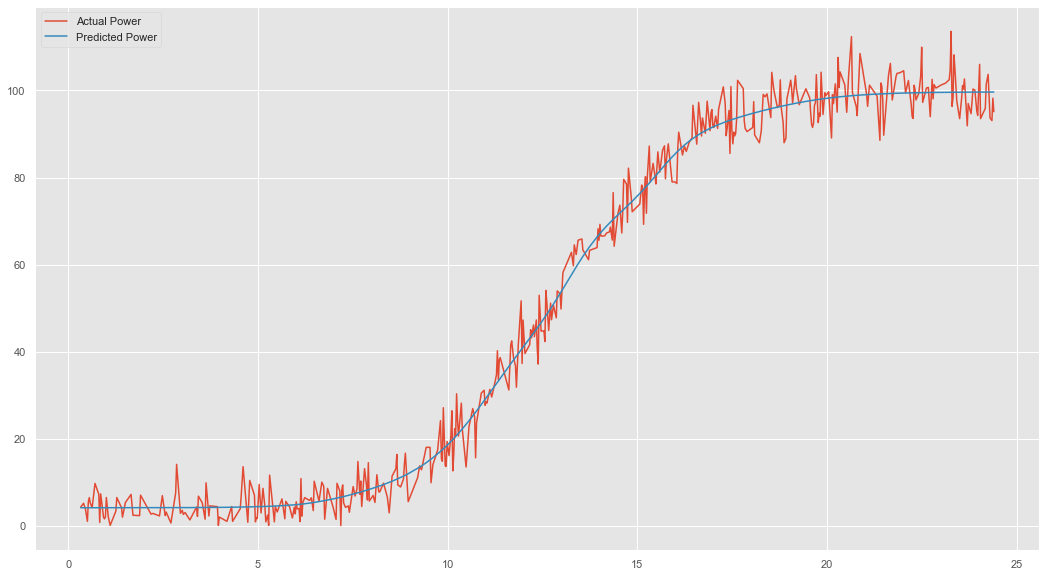

In [47]:
# Plot Data and Predictions to Visualise
plt.plot(x, y, label='Actual Power')
plt.plot(x, model.predict(x), label='Predicted Power')
plt.legend()

In [48]:
# Save the model
model.save("model.h5")
print("model saved")

model saved


#### References

1. https://www.esb.ie/tns/education-hub/future-energy/wind-energy

2. https://www.encyclopedia.com/earth-and-environment/ecology-and-environmentalism/environmental-studies/s-shaped-growth-curve#:~:text=S%2Dshaped%20growth%20curve(sigmoid,then%20declines%20in%20a%20negative